# EDA - Análisis Exploratorio de Datos

Importo las librerias necesaria

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Ingesto el archivo 'AccidentesAviones.csv' y visualizo su estructura

In [2]:
df = pd.read_csv('AccidentesAviones.csv')
df.head()

,Unnamed: 0,fecha,HORA declarada,Ruta,OperadOR,flight_no,route,ac_type,registration,cn_ln,all_aboard,PASAJEROS A BORDO,crew_aboard,cantidad de fallecidos,passenger_fatalities,crew_fatalities,ground,summary
0,0,"September 17, 1908",1718,"Fort Myer, Virginia",Military - U.S. Army,?,Demonstration,Wright Flyer III,?,1,2,1,1,1,1,0,0,"During a demonstration flight, a U.S. Army fly..."
1,1,"September 07, 1909",?,"Juvisy-sur-Orge, France",?,?,Air show,Wright Byplane,SC1,?,1,0,1,1,0,0,0,Eugene Lefebvre was the first pilot to ever be...
2,2,"July 12, 1912",0630,"Atlantic City, New Jersey",Military - U.S. Navy,?,Test flight,Dirigible,?,?,5,0,5,5,0,5,0,First U.S. dirigible Akron exploded just offsh...
3,3,"August 06, 1913",?,"Victoria, British Columbia, Canada",Private,?,?,Curtiss seaplane,?,?,1,0,1,1,0,1,0,The first fatal airplane accident in Canada oc...
4,4,"September 09, 1913",1830,Over the North Sea,Military - German Navy,?,?,Zeppelin L-1 (airship),?,?,20,?,?,14,?,?,0,The airship flew into a thunderstorm and encou...


Veo las columnas

In [3]:
df.columns

Index(['Unnamed: 0', 'fecha', 'HORA declarada', 'Ruta', 'OperadOR',
       'flight_no', 'route', 'ac_type', 'registration', 'cn_ln', 'all_aboard',
       'PASAJEROS A BORDO', 'crew_aboard', 'cantidad de fallecidos',
       'passenger_fatalities', 'crew_fatalities', 'ground', 'summary'],
      dtype='object')

Tamaño del DF

In [4]:
df.shape

(5008, 18)

Analizo la informacion de las columnas, como faltantes y tipos de dato

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5008 entries, 0 to 5007
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Unnamed: 0              5008 non-null   int64 
 1   fecha                   5008 non-null   object
 2   HORA declarada          5008 non-null   object
 3   Ruta                    5008 non-null   object
 4   OperadOR                5008 non-null   object
 5   flight_no               5008 non-null   object
 6   route                   5008 non-null   object
 7   ac_type                 5008 non-null   object
 8   registration            5008 non-null   object
 9   cn_ln                   5008 non-null   object
 10  all_aboard              5008 non-null   object
 11  PASAJEROS A BORDO       5008 non-null   object
 12  crew_aboard             5008 non-null   object
 13  cantidad de fallecidos  5008 non-null   object
 14  passenger_fatalities    5008 non-null   object
 15  crew

### Tratamiento de nulos

In [6]:
# Reemplazo los ? por nulo
df.replace({'?': np.nan}, inplace=True)

In [7]:
# Cantidad de nulos por columnas
df.isnull().sum()

Unnamed: 0                   0
fecha                        0
HORA declarada            1504
Ruta                         5
OperadOR                    10
flight_no                 3682
route                      762
ac_type                     13
registration               272
cn_ln                      667
all_aboard                  17
PASAJEROS A BORDO          221
crew_aboard                219
cantidad de fallecidos       8
passenger_fatalities       235
crew_fatalities            235
ground                      44
summary                     59
dtype: int64

In [8]:
# Porcentaje de nulos por columna
df.isnull().sum()/df.shape[0]

Unnamed: 0                0.000000
fecha                     0.000000
HORA declarada            0.300319
Ruta                      0.000998
OperadOR                  0.001997
flight_no                 0.735224
route                     0.152157
ac_type                   0.002596
registration              0.054313
cn_ln                     0.133187
all_aboard                0.003395
PASAJEROS A BORDO         0.044129
crew_aboard               0.043730
cantidad de fallecidos    0.001597
passenger_fatalities      0.046925
crew_fatalities           0.046925
ground                    0.008786
summary                   0.011781
dtype: float64

In [9]:
# La columna 'flight_no' contiene un alto porcentaje de nulos(73,52%) procedo a eliminarla
df.drop(columns=['flight_no'], inplace=True)

### Tratamiento de duplicados

In [10]:
# Compruebo si existen duplicados
df.duplicated(subset=None).sum()


0

* No existen duplicados lo que implica ausencia de datos redundantes

## Realizo algunas modificaciones para normalizar los datos

In [11]:
# Elimino la columna 'Unnamed: 0' ya que es el indice en el conjunto de datos
df.drop(columns=['Unnamed: 0'], inplace=True)

In [12]:
# Renombro columnas para mejor comprension
df = df.rename(columns={'HORA declarada' : 'Time',
                        'fecha' : 'Date',
                        'Ruta' : 'Location',
                        'OperadOR' : 'Operator',
                        'route' : 'Route',
                        'ac_type' : 'Type',
                        'registration' : 'Registration',
                        'cn_ln' : 'Cn/Ln',
                        'all_aboard' : 'Total Aboard',
                        'PASAJEROS A BORDO' : 'Passengers Aboard',
                        'crew_aboard' : 'Crew Aboard',
                        'cantidad de fallecidos' : 'Total Fatalities',
                        'passenger_fatalities' : 'Passengers Fatalities',
                        'crew_fatalities' : 'Crew Fatalities',
                        'ground' : 'Ground',
                        'summary' : 'Summary'})

In [13]:
# Cambio el formato de fecha
df['Date'] = pd.to_datetime(df['Date']).dt.strftime('%d/%m/%Y')

In [14]:
# Cambio el tipo de dato para poder corregir falencias
df['Time'] = df['Time'].astype(str)
# Elimino caracteres que me pueden perjudicar al momento de estandarizar la hora
df['Time'] = df['Time'].str.replace(':', '').str.replace('c', '').str.replace(';', '').str.replace('Z', '')
# Quito los espacios vacios que pueden haber quedado
df['Time'] = df['Time'].str.strip()
# Transformo el str a datatime y del datatime me quedo con HH:MM
df['Time'] = pd.to_datetime(df['Time'], format='%H%M')

In [15]:
df['Time'] = df['Time'].dt.strftime('%H:%M')

In [16]:
# Cambio el tipo de dato de las columnas 'Total Aboard', 'Passagers Aboard',
# 'Crew Aboard', 'Total Fatalities', 'Passagers Fatalities', 'Crew Fatalities', 'Ground' y 'Date'
df['Total Aboard'] = df['Total Aboard'].astype(float, errors='ignore')
df['Passengers Aboard'] = df['Passengers Aboard'].astype(float, errors='ignore')
df['Crew Aboard'] = df['Crew Aboard'].astype(float, errors='ignore')
df['Total Fatalities'] = df['Total Fatalities'].astype(float, errors='ignore')
df['Passengers Fatalities'] = df['Passengers Fatalities'].astype(float, errors='ignore')
df['Crew Fatalities'] = df['Crew Fatalities'].astype(float, errors='ignore')
df['Ground'] = df['Ground'].astype(float, errors='ignore')
df['Date'] = pd.to_datetime(df['Date'])

C:\Users\dines\AppData\Local\Temp\ipykernel_30464\2926171116.py:10: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date'] = pd.to_datetime(df['Date'])


### Tratamiento de Outliers

In [17]:
# Importo la libreria scipy
from scipy import stats

* Realizo el análisis en las columnas con valores numéricos

In [18]:
# Separo del df original las columnas que contienen datos numericos para su análisis
df_outliers = df.iloc[:,8:15]

In [19]:
df_outliers.head()

,Total Aboard,Passengers Aboard,Crew Aboard,Total Fatalities,Passengers Fatalities,Crew Fatalities,Ground
0,2.0,1.0,1.0,1.0,1.0,0.0,0.0
1,1.0,0.0,1.0,1.0,0.0,0.0,0.0
2,5.0,0.0,5.0,5.0,0.0,5.0,0.0
3,1.0,0.0,1.0,1.0,0.0,1.0,0.0
4,20.0,NaN,NaN,14.0,NaN,NaN,0.0


In [ ]:

df_outliers['Total Aboard'] = df_outliers['Total Aboard'].astype(float)
df_outliers['Passengers Aboard'] = df_outliers['Passengers Aboard'].astype(float)
df_outliers['Crew Aboard'] = df_outliers['Crew Aboard'].astype(float)
df_outliers['Total Fatalities'] = df_outliers['Total Fatalities'].astype(float)
df_outliers['Passengers Fatalities'] = df_outliers['Passengers Fatalities'].astype(float)
df_outliers['Crew Fatalities'] = df_outliers['Crew Fatalities'].astype(float)
df_outliers['Ground'] = df_outliers['Ground'].astype(float)


In [20]:
df_outliers.describe()

,Total Aboard,Passengers Aboard,Crew Aboard,Total Fatalities,Passengers Fatalities,Crew Fatalities,Ground
count,4991.000000,4787.000000,4789.000000,5000.000000,4773.000000,4773.000000,4964.000000
mean,31.121218,26.877376,4.519524,22.294000,18.940708,3.587262,1.718372
std,45.479965,44.035342,3.758072,35.000385,34.065190,3.177315,55.495544
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,3.000000,2.000000,4.000000,1.000000,2.000000,0.000000
50%,16.000000,12.000000,4.000000,11.000000,7.000000,3.000000,0.000000
75%,35.000000,30.000000,6.000000,25.000000,21.000000,5.000000,0.000000
max,644.000000,614.000000,83.000000,583.000000,560.000000,43.000000,2750.000000


In [21]:
z_scores = np.abs(stats.zscore(df_outliers))
outliers = df[(z_scores > 2).all(axis=1)]
outliers


,Date,Time,Location,Operator,Route,Type,Registration,Cn/Ln,Total Aboard,Passengers Aboard,Crew Aboard,Total Fatalities,Passengers Fatalities,Crew Fatalities,Ground,Summary


* De acuerdo a los resultados no encontramos valores outliers

In [22]:
savefile_path = 'accidentes_aviones.csv'
df.to_csv(savefile_path, sep=';')

# Visualización de datos

## Total de accidentes

### Accidentes por año

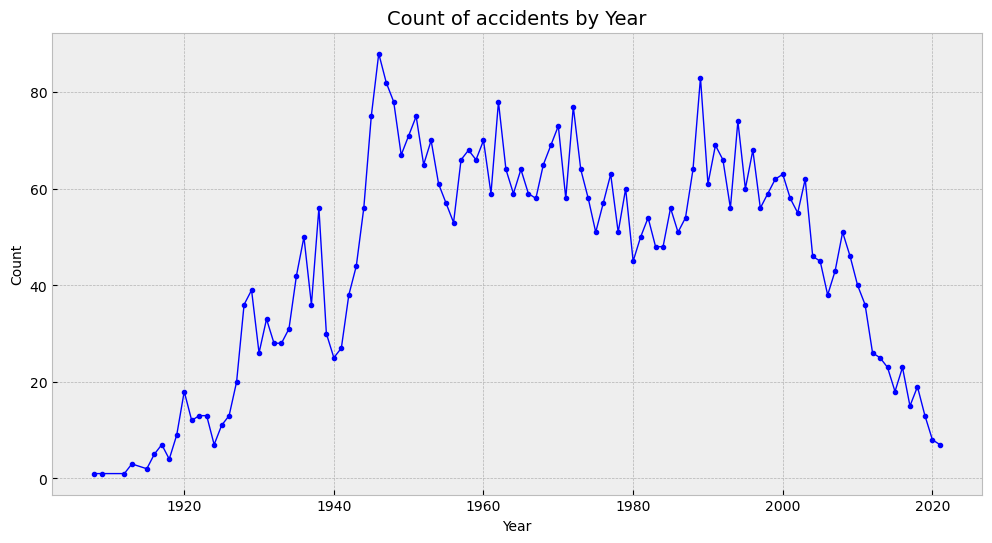

In [23]:
group_year = df.groupby(df.Date.dt.year)[['Date']].count()
group_year = group_year.rename(columns={"Date": "Count"})

plt.figure(figsize=(12,6))
plt.style.use('bmh')
plt.plot(group_year.index, 'Count', data=group_year, color='blue', marker = ".", linewidth=1)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.title('Count of accidents by Year', loc='Center', fontsize=14)
plt.show()

* Podemos notar que existe una marcada tendencia a la suba entre 1940 y 1946, debido a las consecuencias de la segunda guerra mundial.
* Observamos que de 265 accidentes aereos 95 corresponden a vuelos Militares.
* En esos años y consecuencia de la segunda guerra mundial se acelero notablemente la producción de aeronaves, un indicio mas de el alza en los accidentes.
* Se puede observar una marcada disminucion de los aacidentes aereos desde 2008 si lo compramos con la ocurrencia que traia desde 1950 hasta 2003


In [24]:
date_start = pd.to_datetime('01-01-1940')
date_end = pd.to_datetime('31-12-1945')
date_between = df[(df['Date']>= date_start) & (df['Date'] <= date_end)]
date_between[['Date', 'Location', 'Operator','Type']]

C:\Users\dines\AppData\Local\Temp\ipykernel_30464\998023406.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  date_end = pd.to_datetime('31-12-1945')


,Date,Location,Operator,Type
575,1940-01-22,"Denpasar, Indonesia",KNILM,Lockheed 14 Super Electra
576,1940-10-02,"Near Cosenza, Italy",Ala Littoria SA,Savoia-Marchetti SM-75
577,1940-02-27,"Near Bucaramanga, Columbia",SCADTA,Boeing 247D
578,1940-01-03,Gulf of Oman,Imperial Airways,Handley Page HP-42
579,1940-03-16,"Stromboli Island, Italy",Ala Littoria,Savoia Marchetti SM 73
...,...,...,...,...
835,1945-08-12,"Near Billings, Montana",Military - U.S. Army,Douglas C-47
836,1945-12-18,"Voksenkollen, Norway",Military - Royal Air Force,Douglas C-47B
837,1945-12-25,"Bangui, French Equatorial Africa",Air France,Lockheed 18 Lodestar
838,1945-12-25,"Near Dudinka, Russia",Polyarnya Aviatsiya,Douglas DC-3


In [25]:
military_count = date_between[date_between['Operator'].notnull() & date_between['Operator'].str.contains('Military')]
military_count['Operator'].count()

95

### Aeronaves Militares VS de Pasajeros

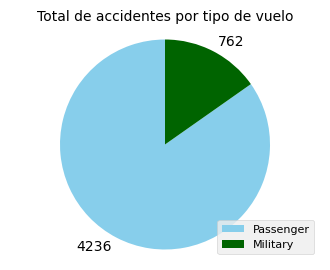

In [72]:
aux = df.copy()
aux['isMilitary'] = aux.Operator.str.contains('Military')
aux = aux.groupby('isMilitary')[['isMilitary']].count()
aux.index = ['Passenger', 'Military']

color = ['skyblue', 'darkgreen']
plt.figure(figsize=(4,3))
patches, texts = plt.pie(aux.isMilitary, colors=color, labels=aux.isMilitary, startangle=90)
plt.legend(patches, aux.index, loc='lower right', fontsize=8)
plt.axis('equal')
plt.title('Total de accidentes por tipo de vuelo', loc='Center', fontsize=10)
plt.show()

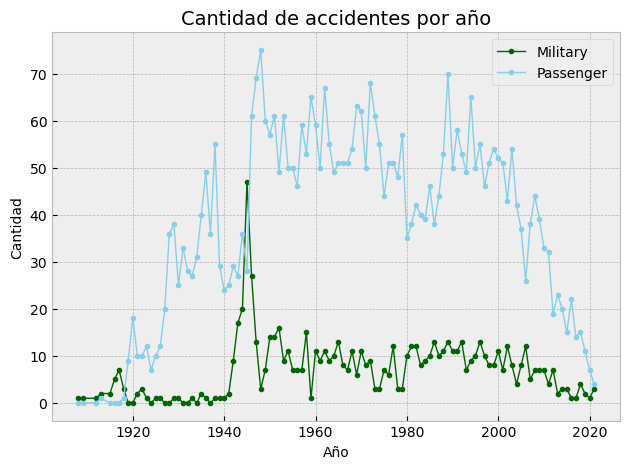

In [73]:
aux2 = df.copy()
aux2['Military'] = aux2.Operator.str.contains('Military')
aux2['Passenger'] = aux2.Military == False
aux2 = aux2.loc[:, ['Date', 'Military', 'Passenger']]
aux2 = aux2.groupby(aux2.Date.dt.year)[['Military', 'Passenger']].aggregate(np.count_nonzero)

plt.plot(aux2.index, 'Military', data=aux2, color='darkgreen', marker = ".", linewidth=1)
plt.plot(aux2.index, 'Passenger', data=aux2, color='skyblue', marker = ".", linewidth=1)
plt.legend(fontsize=10)
plt.xlabel('Año', fontsize=10)
plt.ylabel('Cantidad', fontsize=10)
plt.title('Cantidad de accidentes por año', loc='Center', fontsize=14)
plt.tight_layout()
plt.show()

* Coincidentemente podemos observar como durante la segunda guerra mundial los accidentes de unidades militares sube considerablemente.

## Personas a bordo

### Sobrevivientes vs Fallecidos

In [ ]:
df.head(1)

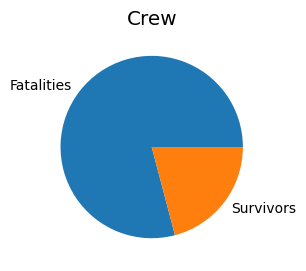

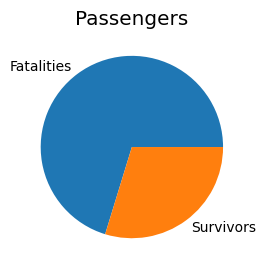

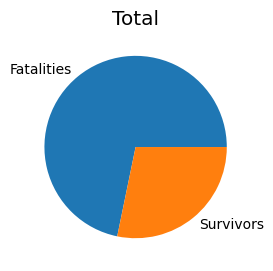

In [106]:
#Tripulacion
sns.set_palette('tab10')
plt.figure(figsize=(10,8))
Aboard = df['Crew Aboard'].sum()
Fatalities = df['Crew Fatalities'].sum()
Survivors = Aboard - Fatalities

y = np.array([Fatalities, Survivors])
mylabels = ["Fatalities", "Survivors"]
plt.subplot(1,3,1)
plt.title('Crew')
plt.pie(y, labels = mylabels)


# Pasajeros
#sns.set_palette('pastel')
plt.figure(figsize=(10,8))
Aboard1 = df['Passengers Aboard'].sum()
Fatalities1 = df['Passengers Fatalities'].sum()
Survivors1 = Aboard1 - Fatalities1

y = np.array([Fatalities1, Survivors1])
mylabels = ["Fatalities", "Survivors"]
plt.subplot(1,3,2)
plt.title('Passengers')
plt.pie(y, labels = mylabels)

# Total
plt.figure(figsize=(10,8))
Aboard2 = df['Total Aboard'].sum()
Fatalities2 = df['Total Fatalities'].sum()
Survivors2 = Aboard2 - Fatalities2

y = np.array([Fatalities2, Survivors2])
mylabels = ["Fatalities", "Survivors"]
plt.subplot(1,3,3)
plt.title('Total')
plt.pie(y, labels = mylabels)
plt.show()

## Operador con mas accidentes

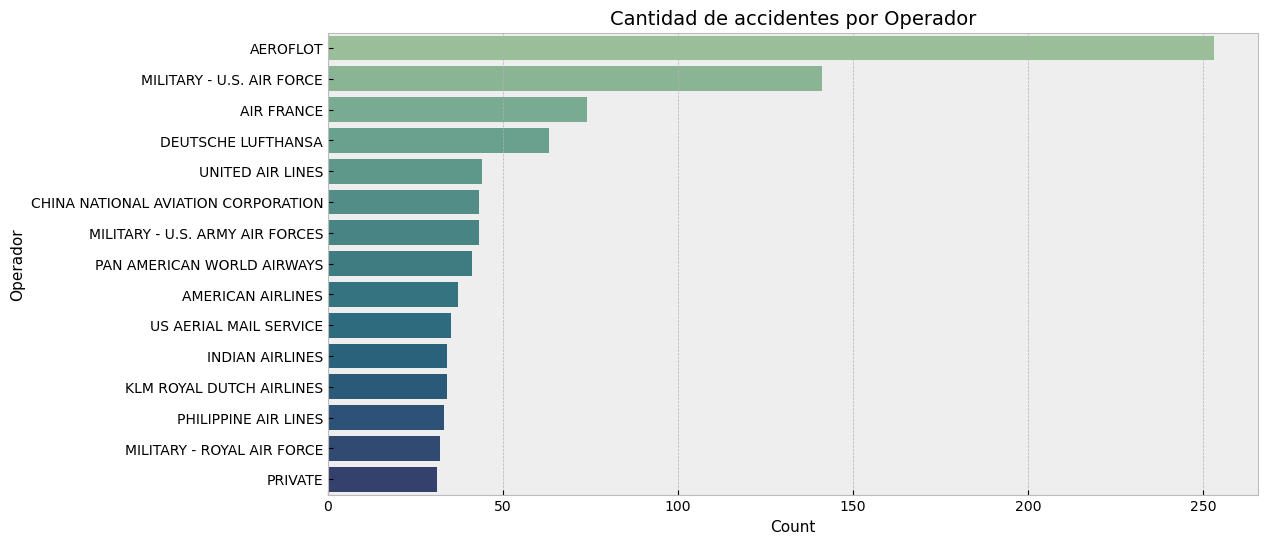

In [81]:
Data = df.copy()
Data.Operator = Data.Operator.str.upper()
Data.Operator = Data.Operator.replace('A B AEROTRANSPORT', 'AB AEROTRANSPORT')

tot_operador = Data.groupby('Operator')[['Operator']].count()
tot_operador = tot_operador.rename(columns={'Operator': 'Count'})
tot_operador = tot_operador.sort_values(by='Count', ascending=False).head(15)

plt.figure(figsize=(12,6))
sns.barplot(y=tot_operador.index, x='Count', data=tot_operador, palette='crest', orient='h')
plt.xlabel('Count', fontsize=11)
plt.ylabel('Operador', fontsize=11)
plt.title('Cantidad de accidentes por Operador', loc='Center', fontsize=14)
plt.show()

## Tipo de Aeronave con mas accidentes

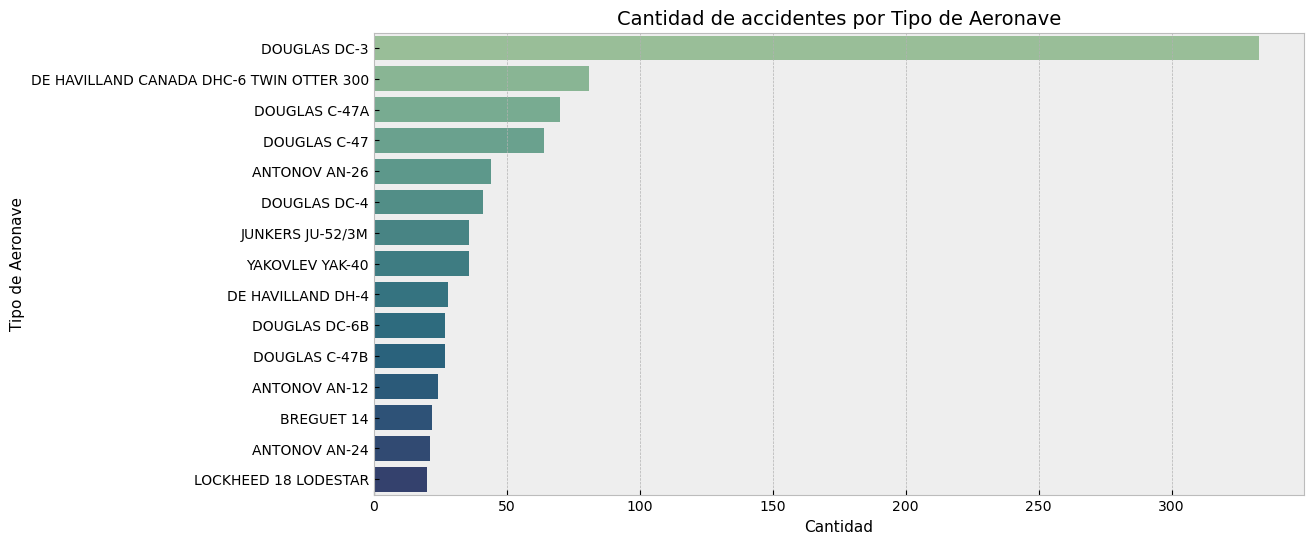

In [103]:
Data1 = df.copy()
Data1.Type = Data1.Type.str.upper()

total_type = Data1.groupby('Type')[['Type']].count()
total_type = total_type.rename(columns={'Type': 'Count'})
total_type = total_type.sort_values(by='Count', ascending=False).head(15)

plt.figure(figsize=(12,6))
sns.barplot(x=total_type['Count'], y=total_type.index, palette='crest', orient='h')
plt.xlabel('Cantidad', fontsize=11)
plt.ylabel('Tipo de Aeronave', fontsize=11)
plt.title('Cantidad de accidentes por Tipo de Aeronave', loc='Center', fontsize=14)
plt.show()

([<matplotlib.patches.Wedge at 0x20b27f4d210>,
 [Text(0.9363724542436214, 0.5772405277990945, 'Douglas'),
  Text(0.3514871225913912, 1.0423323858791036, 'Antonov'),
  Text(-0.8461812328935208, -0.7028352019490781, 'Total')])

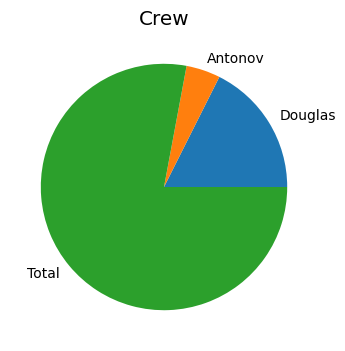

In [155]:
Data = df.copy()
Data.Type = Data.Type.str.upper()

douglas = Data['Type'].str.contains('DOUGLAS').sum()
antonov = Data['Type'].str.contains('ANTONOV').sum()
total = Data['Type'].count()

y = np.array([douglas,antonov, total])
mylabels = ['Douglas', 'Antonov', 'Total']
sns.set_palette('tab10')
plt.figure(figsize=(5,4))
plt.title('Crew')
plt.pie(y, labels = mylabels)


In [116]:
Data = df.copy()
Data.Type = Data.Type.str.upper()
Data.Type



0                    WRIGHT FLYER III
1                      WRIGHT BYPLANE
2                           DIRIGIBLE
3                    CURTISS SEAPLANE
4              ZEPPELIN L-1 (AIRSHIP)
                    ...              
5003      EUROCOPTER AS350B3 ECUREUIL
5004    BEECHCRAFT B300 KING AIR 350I
5005                 BEECHCRAFT 1900D
5006         LOCKHEED C-130H HERCULES
5007               ANTONOV AN 26B-100
Name: Type, Length: 5008, dtype: object

In [141]:
Data['Type'].isnull().sum()

0

In [140]:
Data.dropna(inplace=True)

In [ ]:

antonov = df['Type'].str.contains('ANTONOV').sum()
total = douglas + antonov

In [115]:
douglas

0